In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


In [2]:
# 生成二分类数据集
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=42)

# 保存数据到 CSV 文件
df = pd.DataFrame(X, columns=["Feature1", "Feature2"])
df["Label"] = y
df.to_csv("logistic_regression_dataset.csv", index=False)

print("Dataset saved as logistic_regression_dataset.csv")


Dataset saved as logistic_regression_dataset.csv


In [3]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model)

            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(model)
        return [1 if p > 0.5 else 0 for p in predictions]


In [4]:
# 加载数据
data = pd.read_csv("logistic_regression_dataset.csv")
X = data[["Feature1", "Feature2"]].values
y = data["Label"].values

# 创建并训练模型
log_reg = LogisticRegression(learning_rate=0.01, epochs=1000)
log_reg.fit(X, y)

# 输出训练后的权重和偏置
print(f"Weights: {log_reg.weights}, Bias: {log_reg.bias}")


Weights: [ 1.94979669 -0.30081224], Bias: 0.01087625981753412


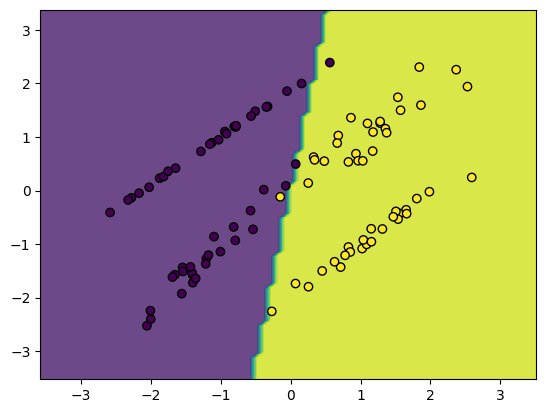

In [5]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array(Z).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.show()

plot_decision_boundary(X, y, log_reg)
